In [21]:
pwd

'/users/ashley/road2SKA/projectG_supervised_latent_radiogals'

In [19]:
import numpy as np
import astropy
from PIL import Image
import os
import pandas as pd

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [22]:
dataroot_cutouts_asinh = f"../roadtoska/LoTTS_data/"
datacutout_cutouts_asinh = f"LoTSS_cutouts_asinh"
imgpath_cutouts_asinh = f"{dataroot_cutouts_asinh}{datacutout_cutouts_asinh}"
all_img = os.listdir(imgpath_cutouts_asinh)
n_images_cutouts_asinh = len(all_img)
print(f"Number of images LoTSS asinh cutouts: {n_images_cutouts_asinh}")


dataroot_cutouts_linear = f"../roadtoska/LoTTS_data/"
datacutout_cutouts_linear = f"LoTSS_cutouts_linear"
imgpath_cutouts_linear = f"{dataroot_cutouts_linear}{datacutout_cutouts_linear}"
all_imgLoTSS_linear = os.listdir(imgpath_cutouts_linear)
n_images_cutouts_linear = len(all_imgLoTSS_linear)
print(f"Number of images LoTSS linear cutouts: {n_images_cutouts_linear}")

EMU_dataroot_cutouts_asinh = f"../roadtoska/EMU_data/"
EMU_datacutout_cutouts_asinh = f"EMU_cutouts_asinh"
EMU_imgpath_cutouts_asinh = f"{EMU_dataroot_cutouts_asinh}{EMU_datacutout_cutouts_asinh}"
all_imgEMU_asinh = os.listdir(EMU_imgpath_cutouts_asinh)
EMU_n_images_cutouts_asinh = len(all_imgEMU_asinh)
print(f"Number of images EMU asinh cutouts: {EMU_n_images_cutouts_asinh}")

EMU_dataroot_cutouts_linear = f"../roadtoska/EMU_data/"
EMU_datacutout_cutouts_linear = f"EMU_cutouts_linear"
EMU_imgpath_cutouts_linear = f"{EMU_dataroot_cutouts_linear}{EMU_datacutout_cutouts_linear}"
all_imgEMU_linear = os.listdir(EMU_imgpath_cutouts_linear)
EMU_n_images_cutouts_linear = len(all_imgEMU_linear)
print(f"Number of images EMU linear cutouts: {EMU_n_images_cutouts_linear}")

Number of images LoTSS asinh cutouts: 7607
Number of images LoTSS linear cutouts: 7607
Number of images EMU asinh cutouts: 3557
Number of images EMU linear cutouts: 3557


(89, 89, 4)
LoTSS cutouts asinh


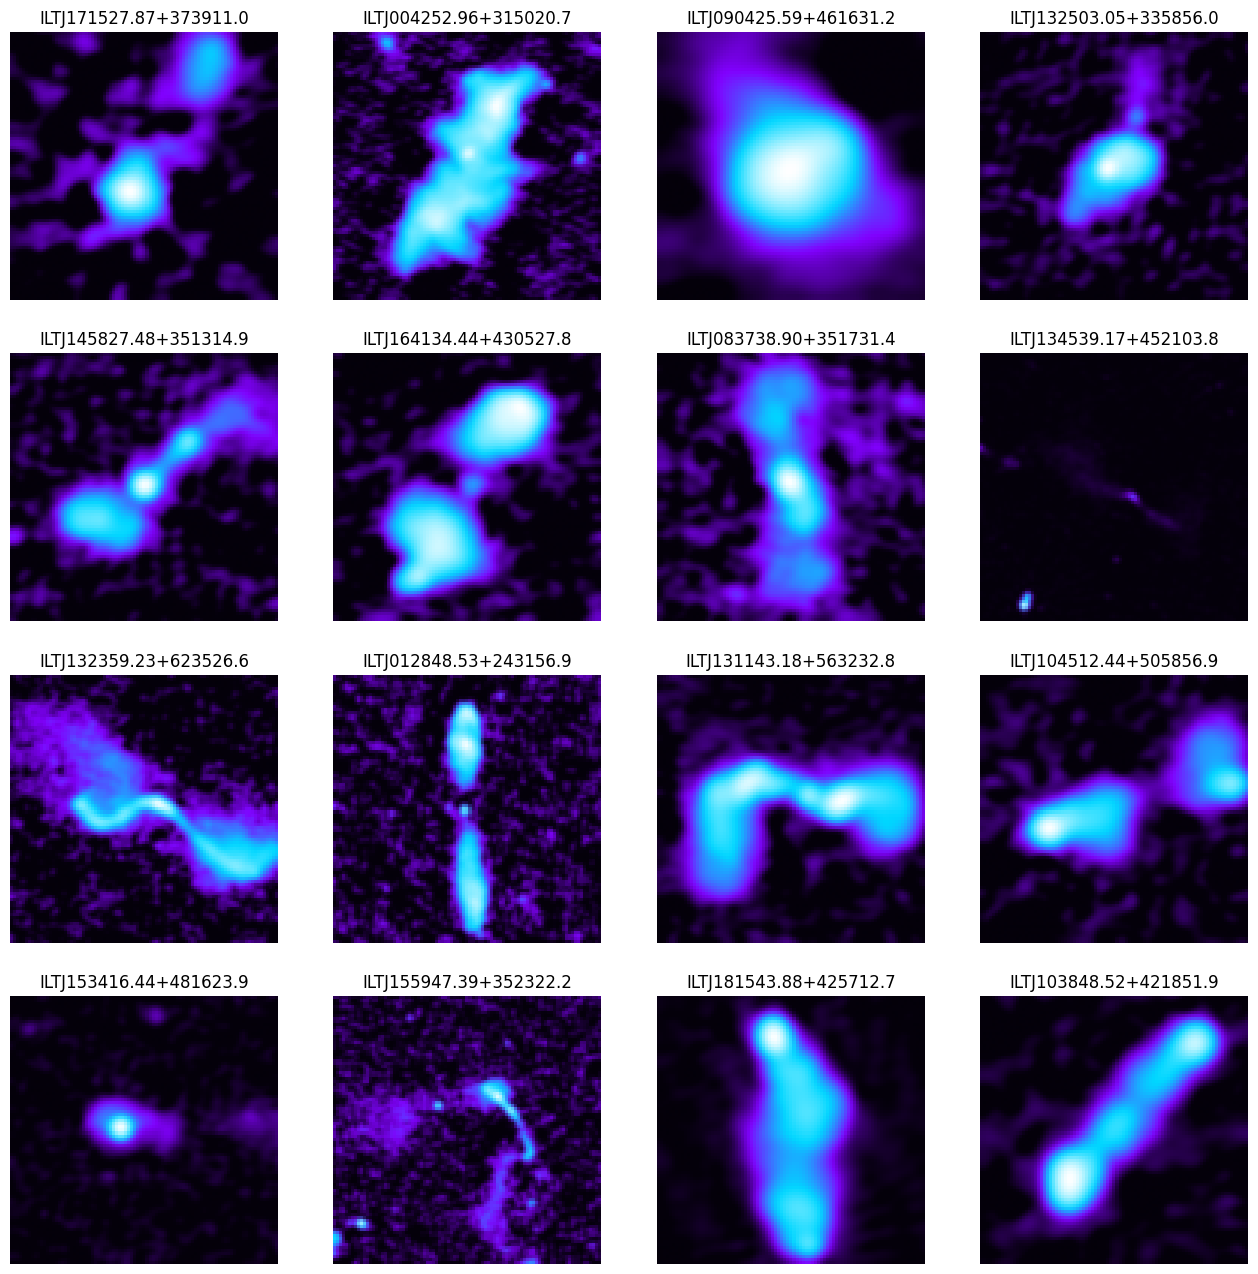

In [23]:
rd_idx = np.random.choice(n_images_cutouts_asinh, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{imgpath_cutouts_asinh}/{all_img[rd_idx[i]]}", 'r')
    title(all_img[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("LoTSS cutouts asinh")

(89, 89, 4)
LoTSS cutouts Linear


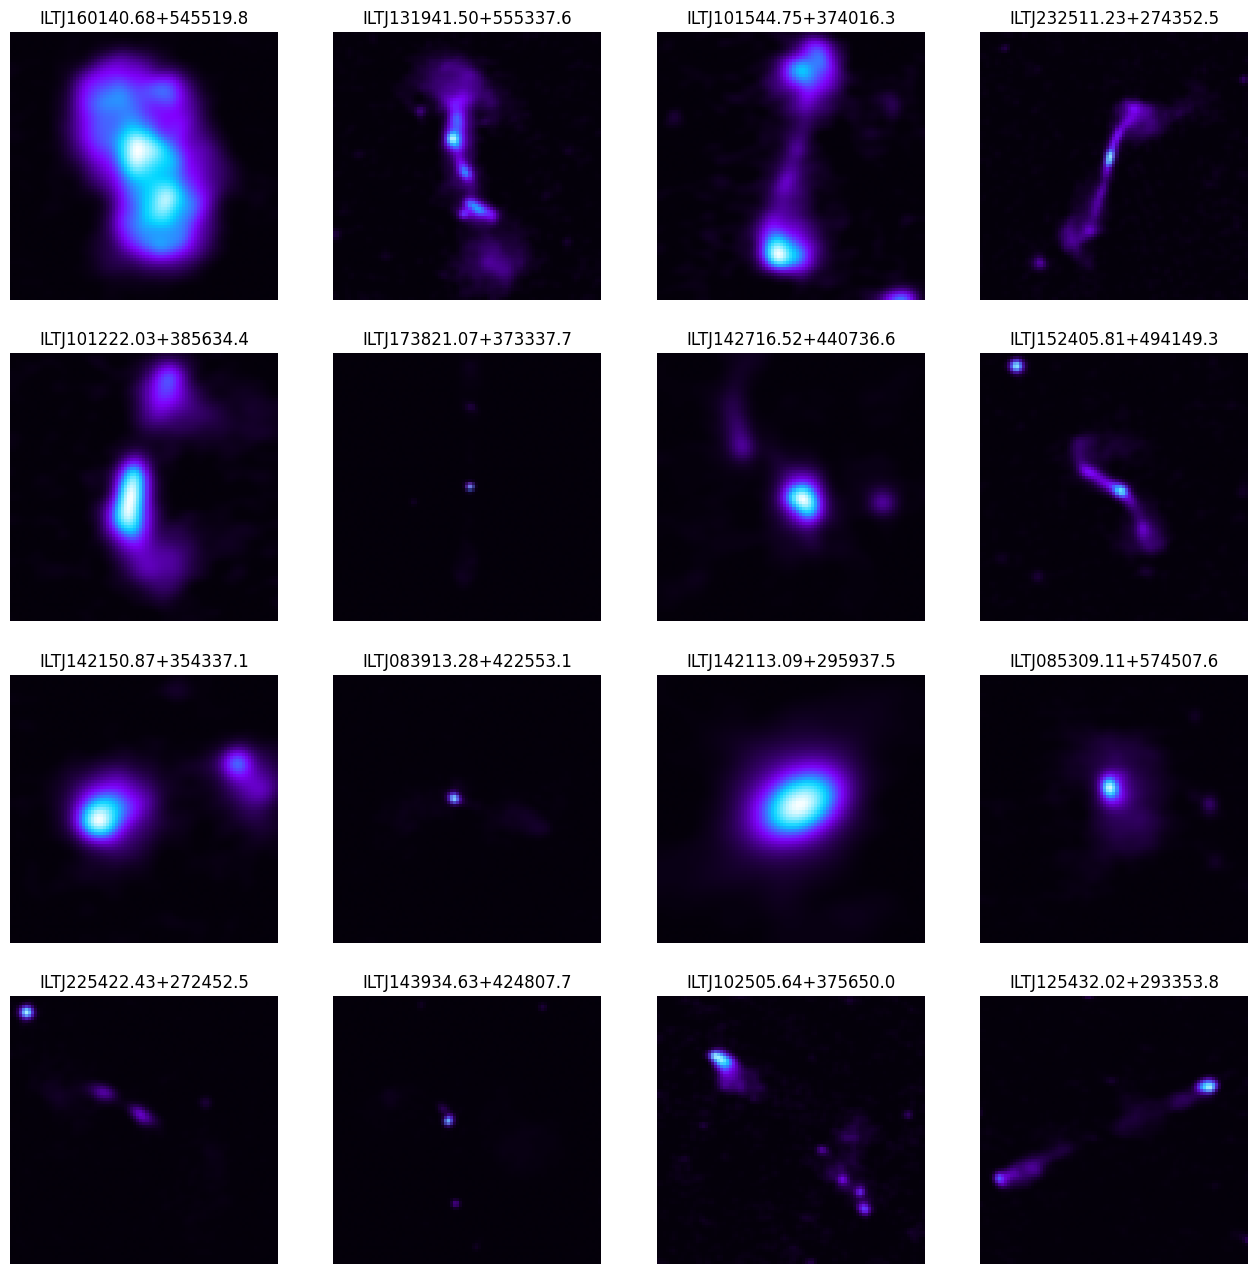

In [24]:
rd_idx = np.random.choice(n_images_cutouts_linear, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{imgpath_cutouts_linear}/{all_imgLoTSS_linear[rd_idx[i]]}", 'r')
    title(all_imgLoTSS_linear[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("LoTSS cutouts Linear")

rd_idx = np.random.choice(EMU_n_images_cutouts_asinh, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{EMU_imgpath_cutouts_asinh}/{all_imgEMU_asinh[rd_idx[i]]}", 'r')
    title(all_imgEMU_asinh[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("EMU cutouts asinh")

(89, 89, 4)
EMU cutouts linear


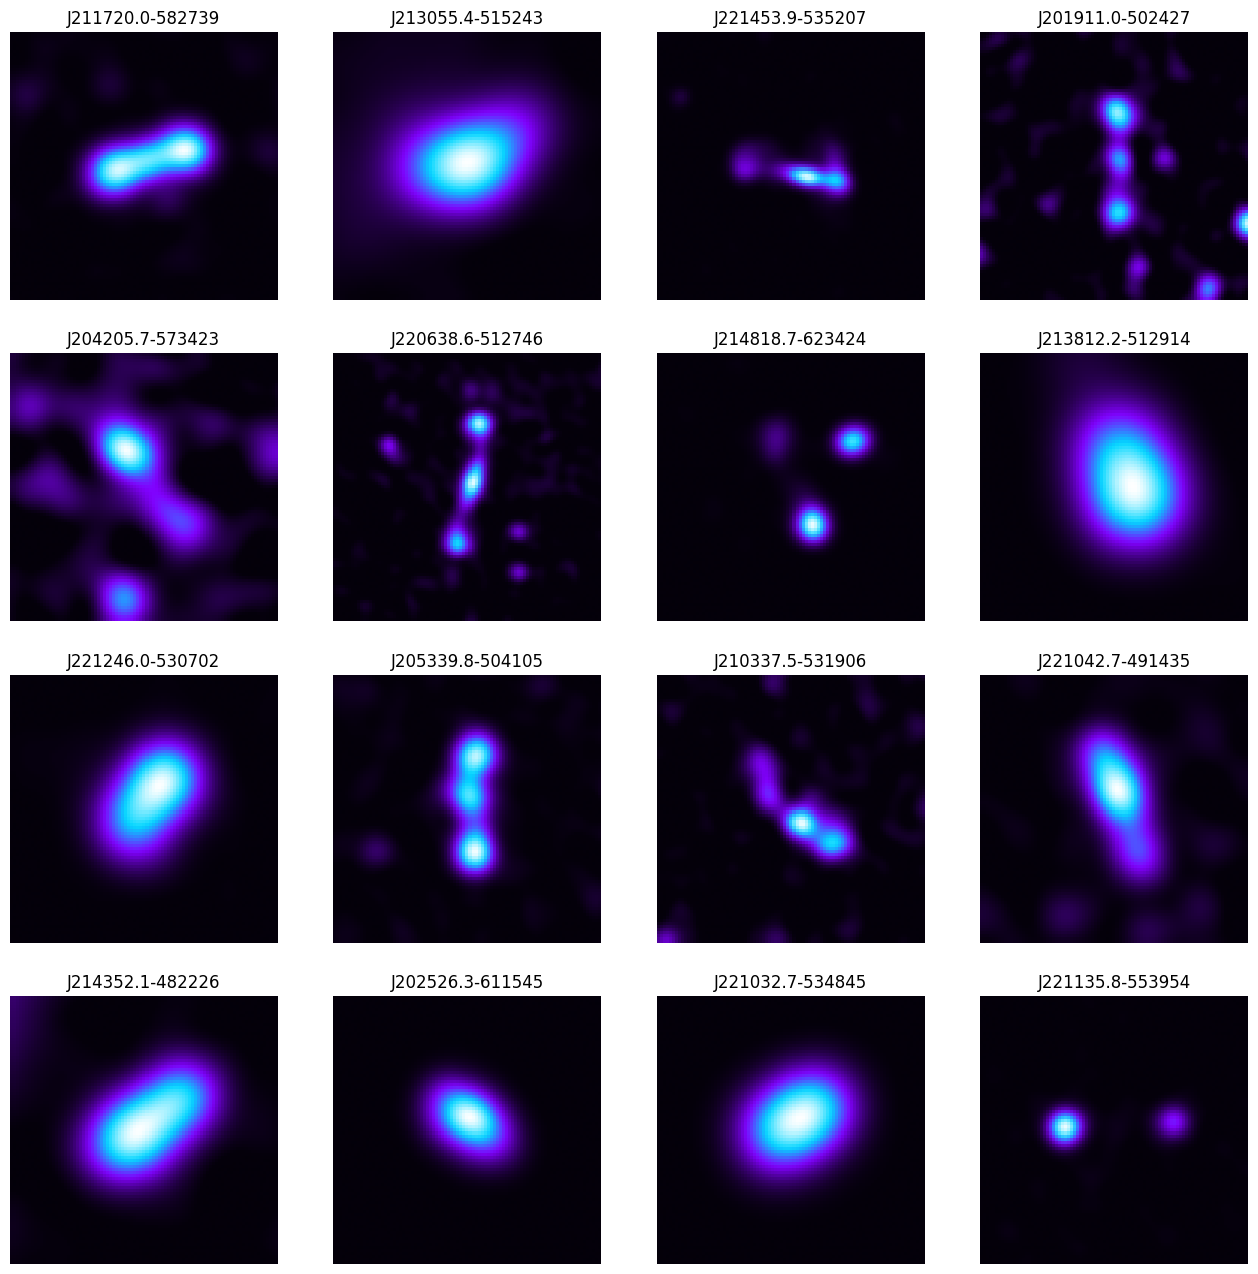

In [25]:
rd_idx = np.random.choice(EMU_n_images_cutouts_linear, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{EMU_imgpath_cutouts_linear}/{all_imgEMU_linear[rd_idx[i]]}", 'r')
    title(all_imgEMU_linear[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)
print("EMU cutouts linear")

# Pre processing

In [33]:
data_csv = pd.read_csv("classifications_horton_et_al_2025_filtered.csv")

In [56]:
data_array = []
target_array = []
def PIL_to_image_array():
    source_names = sorted(list(data_csv["Source_Name"]))
    for source in source_names:
        img_path =  f"../roadtoska/LoTTS_data/LoTSS_cutouts_asinh/{source}.png"
        image = Image.open(img_path)
        img_array = np.asarray(image)
        image_rgb = img_array[:, :, :3]  
        # print(f"RGB image: {image_rgb.shape}")
        image_gray = np.mean(image_rgb, axis=2).astype(np.uint8)
        # print(f"Gray image shape: {image_gray.shape}")  
        # imshow(image_gray, cmap="gray")
        # axis("off")
        # print(image_gray)
        data_array.append(image_gray)

        source_classifications = data_csv.loc[data_csv['Source_Name'] == source, ['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown']]

        source_classes = source_classifications.astype(int).values
        target_array.append(source_classes)
    return np.stack(data_array, axis=0), np.stack(target_array, axis=0)

In [58]:
x, y = PIL_to_image_array()

In [63]:
np.save('images-ashley.npy', x)
np.save('labels-ashley.npy', y)

In [62]:
ls

LICENSE    classifications_horton_et_al_2025_filtered.csv  labels.npy
README.md  images-ashley.npy                               notebooks/
